<a href="https://colab.research.google.com/github/eteh1/Website/blob/main/Time_Series_Forecasting_with_Synthetic_Data_An_ARIMA_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

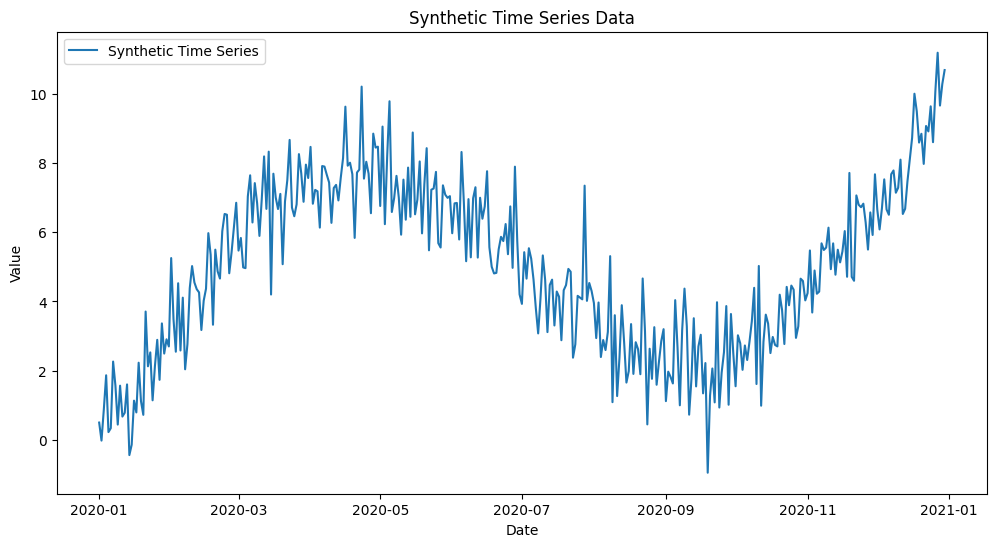

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 16.09680147982821


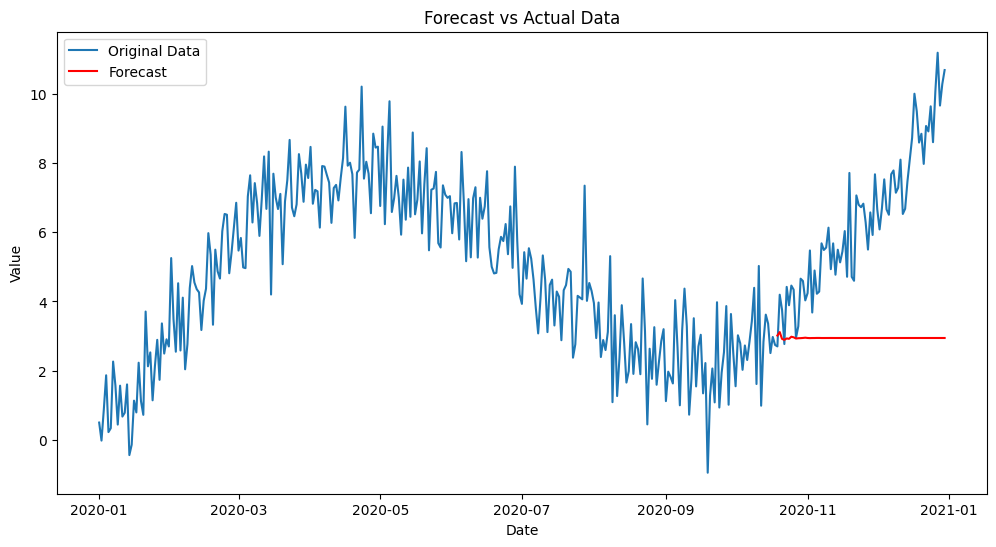

Project Complete! Synthetic dataset saved as 'synthetic_time_series.csv'.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Simulating a dataset for time series forecasting
def generate_synthetic_data():
    np.random.seed(42)
    time_index = pd.date_range(start='2020-01-01', periods=365, freq='D')
    trend = np.linspace(0, 10, 365)
    seasonality = 5 * np.sin(np.linspace(0, 2 * np.pi, 365))
    noise = np.random.normal(0, 1, 365)
    data = trend + seasonality + noise
    return pd.DataFrame({'Date': time_index, 'Value': data})

# Load synthetic data
data = generate_synthetic_data()
data.set_index('Date', inplace=True)

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Synthetic Time Series')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Save the synthetic dataset for GitHub
data.to_csv('synthetic_time_series.csv')

print("Project Complete! Synthetic dataset saved as 'synthetic_time_series.csv'.")
